In [1]:
!nvidia-smi

Sun Nov 10 17:01:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## INSTALAÇÃO DA YOLOv8

In [7]:
!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5934.0/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Treinamento

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mO37KEHVw9fGVbY6E4di")
project = rf.workspace("miocardite-ml").project("heart-localization-group-0")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Heart-Localization-Group-0-3 in yolov8:: 100%|██████████| 4753/4753 [00:00<00:00, 9876.51it/s]


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data='/kaggle/working/Heart-Localization-Group-0-3/data.yaml' epochs=30 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Heart-Localization-Group-0-3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, 

## Análise de Resultados

In [10]:
!ls /kaggle/working/runs/detect/train3

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   train_batch2980.jpg
confusion_matrix.png				   train_batch2981.jpg
confusion_matrix_normalized.png			   train_batch2982.jpg
events.out.tfevents.1731258272.69f9187979f4.175.0  val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
labels_correlogram.jpg				   weights
results.csv


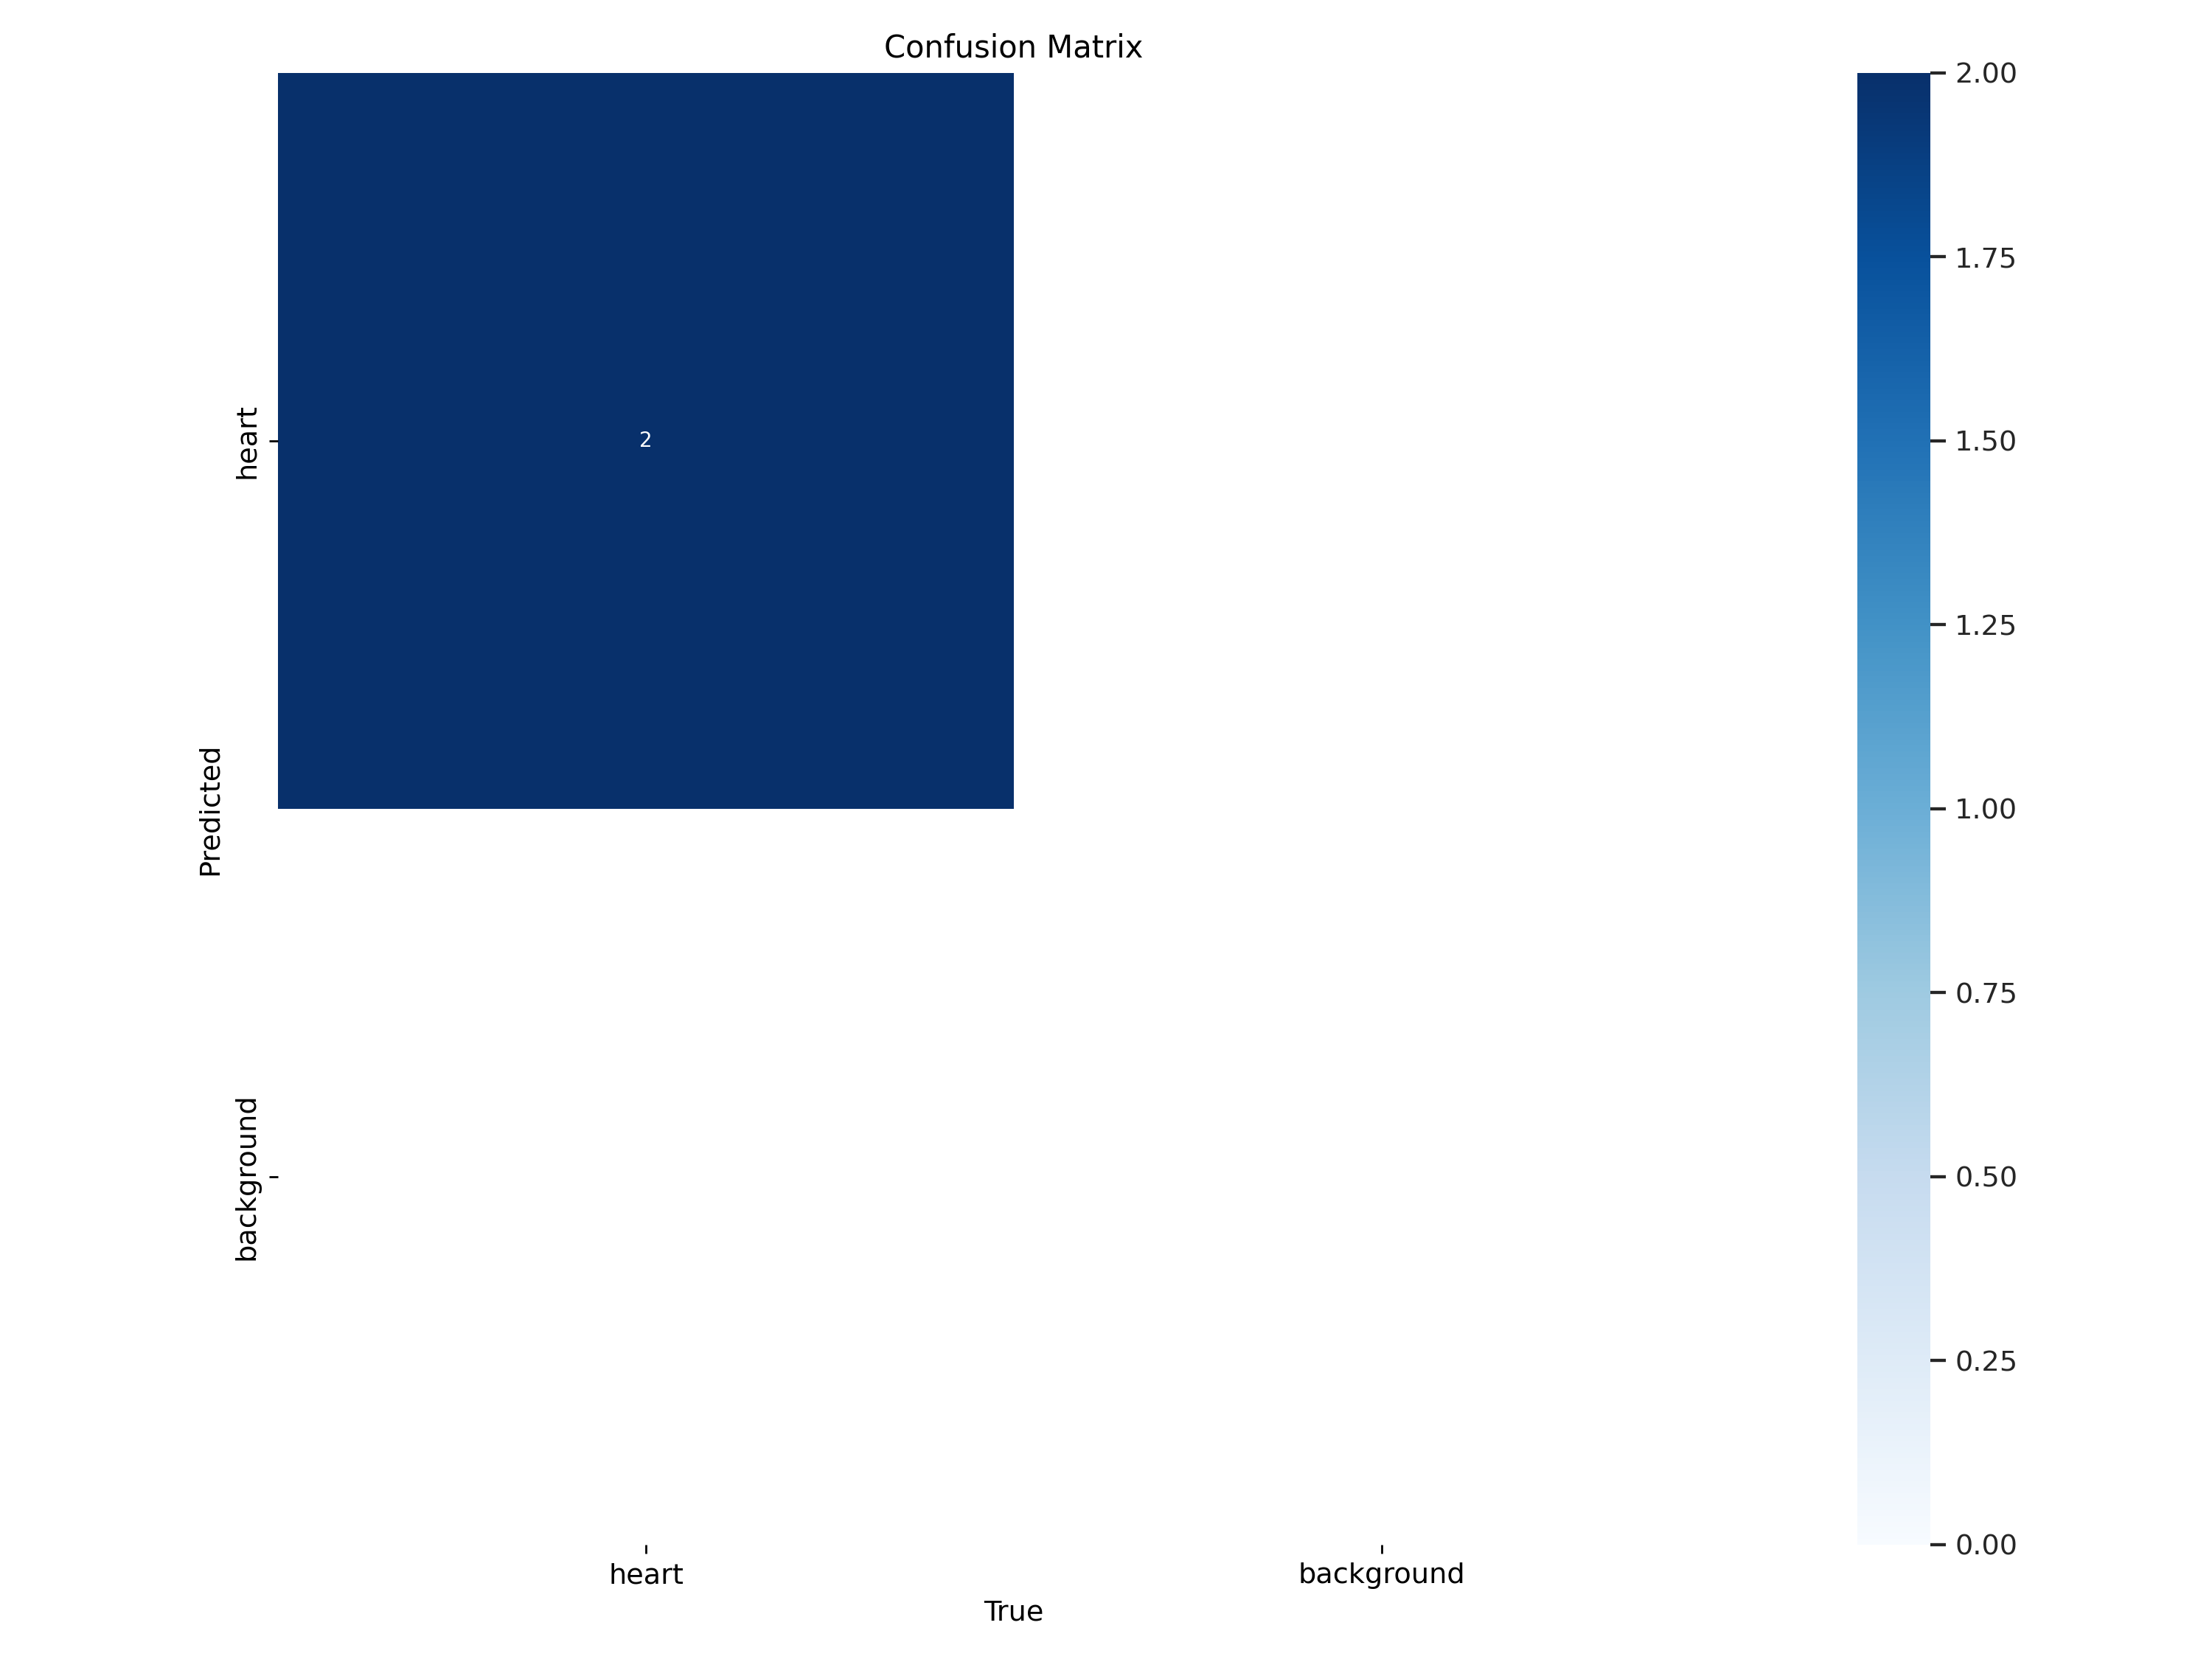

In [11]:
Image(filename=f'/kaggle/working/runs/detect/train3/confusion_matrix.png', width=600)

In [13]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train3/weights/best.pt data='/data.yaml'

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 966, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 635, in val
    validator(model=self.model)
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/validator.py", line 145, in __call__
    self.data = check_det_dataset(self.args.data)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/data/utils.py", line 269, in check_det_dataset
    file = check_file(dataset)
  F

## Armazenando Modelo

In [16]:
# Zipando pasta com resultados
import zipfile
import os

def compactar_pasta(pasta, nome_arquivo_zip):
    with zipfile.ZipFile(nome_arquivo_zip, 'w', zipfile.ZIP_DEFLATED) as zip_file:
        for root, _, files in os.walk(pasta):
            for arquivo in files:
                caminho_completo = os.path.join(root, arquivo)
                zip_file.write(caminho_completo, os.path.relpath(caminho_completo, pasta))

nome_arquivo_zip = f'heart-detection-model-group0.zip'
compactar_pasta('/kaggle/working/runs/detect/train3/', nome_arquivo_zip)